# New SectionImport Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Load Dataset

In [3]:
df = pd.read_csv("/content/telco-customer-churn.csv")

print(df.head())
print(df.shape)
print(df.columns)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# Basic Data Validation (No Heavy Cleaning)
# Check for missing values

In [4]:
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Remove duplicate rows

In [5]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (7043, 21)


##  Define Target Column

# Assume your target column is Churn.

If Churn is Yes / No

In [6]:
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


# Confirm target values

In [7]:
print(df['Churn'].value_counts())


Churn
0    5174
1    1869
Name: count, dtype: int64


# Drop Irrelevant Columns (SAFE METHOD)

# We only drop columns that are clearly non-predictive.

In [8]:
irrelevant_columns = []

for col in df.columns:
    # Drop ID-like columns
    if 'id' in col.lower() or 'number' in col.lower():
        irrelevant_columns.append(col)

    # Drop constant columns
    elif df[col].nunique() == 1:
        irrelevant_columns.append(col)

    # Drop leakage columns
    elif any(word in col.lower() for word in ['reason', 'cancel', 'exit', 'termination']):
        irrelevant_columns.append(col)

# Ensure target is NOT dropped
irrelevant_columns = [col for col in irrelevant_columns if col != 'Churn']

df = df.drop(columns=irrelevant_columns, errors='ignore')

print("Dropped columns:", irrelevant_columns)
print("Remaining columns:", df.columns.tolist())


Dropped columns: ['customerID']
Remaining columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


# Keep Only Numeric Features (Simple & Robust)

# This avoids encoding issues.

In [9]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

print("Numeric dataframe shape:", df_numeric.shape)


Numeric dataframe shape: (7043, 4)


# Feature–Target Split

In [10]:
X = df_numeric.drop('Churn', axis=1)
y = df_numeric['Churn']

print(X.shape, y.shape)


(7043, 3) (7043,)


# Train–Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Feature Scaling

In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train Logistic Regression Model

In [13]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

# Make Predictions

In [14]:
y_pred = model.predict(X_test_scaled)


# Confusion Matrix (FINAL RESULT)

In [15]:
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[957  79]
 [192 181]]


# Model Evaluation

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8076650106458482

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1036
           1       0.70      0.49      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



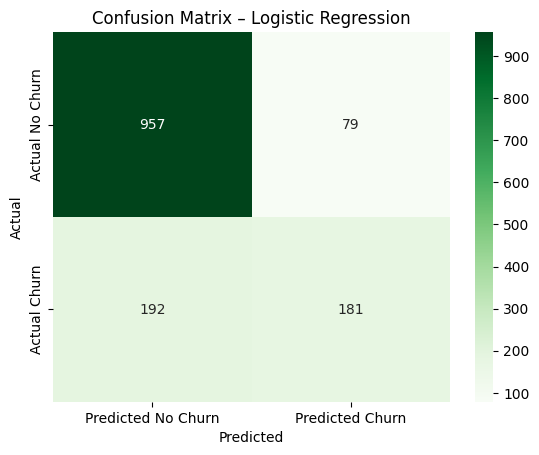

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create DataFrame from confusion matrix
cm_df = pd.DataFrame(
    cm,
    index=['Actual No Churn', 'Actual Churn'],
    columns=['Predicted No Churn', 'Predicted Churn']
)

# Plot heatmap
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Greens'
)

plt.title('Confusion Matrix – Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# New Section